<a href="https://colab.research.google.com/github/Yenuli0808/CM2604_Telco_Customer_Churn-CW/blob/main/notebooks/Task_02/Modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Step 03: Modeling Decision Tress and Neural Network Models**

**Modelling Overview**

---



*   In this notebook develops, two supervised classification models are implemented to predict customer churn:

     1.   Decision Tree Classifier(DT)
     2.   Neural Network(MLP) implemented using TensorFlow/Keras

* To ensure fair comparison, both models use the same preprocessing pipeline and identical training/validation strategy.


*   The models are evaluated using Accuracy, Precision, Recall, ROC-AUC, F1-Score, Confusion matrix and classification report.


Both models are tested on the same clean dataset produced in the cleaning notebook.

**3.a: Import Libraries**

---



In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import (accuracy_score, confusion_matrix, classification_report,roc_auc_score, roc_curve,precision_recall_curve,auc, f1_score)

from sklearn.tree import DecisionTreeClassifier

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)
tf.random.set_seed(RANDOM_STATE)

print("✅ Libraries imported successfully!")

✅ Libraries imported successfully!


**3.b: Import Cleaned Data Set**

In [2]:
# Load the cleaned data set from the git
url_clean = "https://raw.githubusercontent.com/Yenuli0808/CM2604_Telco_Customer_Churn-CW/main/data/Cleaned_Telco_Customer_Churn.csv"

df = pd.read_csv(url_clean)

print("✅ Cleaned Dataset loaded successfully!")
print("\n=== Cleaned Data set overview ===")
print(f"Dataset shape: {df.shape}")

✅ Cleaned Dataset loaded successfully!

=== Cleaned Data set overview ===
Dataset shape: (7032, 24)


**3.c: Quick Look-up on Dataset**

---



In [3]:
# First look at the cleaned dataset
print("==== FIRST 10 ROWS ====\n")
df.head(10)

==== FIRST 10 ROWS ====



,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,TenureGroup,MonthlyChargeGroup,ChargesRatio,ServiceCount
0,Female,0,1,0,1,0,No phone service,DSL,No,Yes,...,Month-to-month,1,Electronic check,29.85,29.85,0,0-12,Low,0.967585,1
1,Male,0,0,0,34,1,No,DSL,Yes,No,...,One year,0,Mailed check,56.95,1889.50,0,25-48,Medium,32.605695,2
2,Male,0,0,0,2,1,No,DSL,Yes,Yes,...,Month-to-month,1,Mailed check,53.85,108.15,1,0-12,Medium,1.971741,2
3,Male,0,0,0,45,0,No phone service,DSL,Yes,No,...,One year,0,Bank transfer (automatic),42.30,1840.75,0,25-48,Medium,42.511547,3
4,Female,0,0,0,2,1,No,Fiber optic,No,No,...,Month-to-month,1,Electronic check,70.70,151.65,1,0-12,High,2.115063,0
5,Female,0,0,0,8,1,Yes,Fiber optic,No,No,...,Month-to-month,1,Electronic check,99.65,820.50,1,0-12,High,8.152012,3
6,Male,0,0,1,22,1,Yes,Fiber optic,No,Yes,...,Month-to-month,1,Credit card (automatic),89.10,1949.40,0,13-24,High,21.635960,2
7,Female,0,0,0,10,0,No phone service,DSL,Yes,No,...,Month-to-month,0,Mailed check,29.75,301.90,0,0-12,Low,9.817886,1
8,Female,0,1,0,28,1,Yes,Fiber optic,No,No,...,Month-to-month,1,Electronic check,104.80,3046.05,1,25-48,Very High,28.790643,4
9,Male,0,0,1,62,1,No,DSL,Yes,Yes,...,One year,0,Bank transfer (automatic),56.15,3487.95,0,61-72,Medium,61.031496,2


In [4]:
print("Class distribution result: \n")
churn_table = pd.DataFrame({
    'Count': df['Churn'].value_counts(),
    'Percentage (%)': (df['Churn'].value_counts(normalize=True) * 100).round(2)
})

print(churn_table)

Class distribution result: 

       Count  Percentage (%)
Churn                       
0       5163           73.42
1       1869           26.58


**3.d: Train-Test Split and Preprocessor**

---



In [5]:
# Defining features and target
x = df.drop('Churn', axis=1)
y = df['Churn']

**3.d.1: Train-Test Split**



In [6]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

print("Training set: ",x_train.shape)
print("Testing set: ",x_test.shape)

Training set:  (5625, 23)
Testing set:  (1407, 23)


In [7]:
print("Class distribution in training set: \n")
churn_table_train = pd.DataFrame({
    'Count': y_train.value_counts(),
    'Percentage (%)': (y_train.value_counts(normalize=True) * 100).round(2)
})
print(churn_table_train)

Class distribution in training set: 

       Count  Percentage (%)
Churn                       
0       4130           73.42
1       1495           26.58


In [8]:
print("Class distribution in testing set: \n")
churn_table_test = pd.DataFrame({
    'Count': y_test.value_counts(),
    'Percentage (%)': (y_test.value_counts(normalize=True) * 100).round(2)
})
print(churn_table_test)

Class distribution in testing set: 

       Count  Percentage (%)
Churn                       
0       1033           73.42
1        374           26.58


**3.d.2: Preprocessing Pipeline**

In [9]:
# Identifying categorical and numerical columns
categorical_cols = x.select_dtypes(include=['object']).columns.tolist()
numerical_cols = x.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("Categorical columns:", categorical_cols,"\n")
print("Numerical columns:", numerical_cols)


Categorical columns: ['gender', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod', 'TenureGroup', 'MonthlyChargeGroup'] 

Numerical columns: ['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'ChargesRatio', 'ServiceCount']


In [10]:
# Preprocessing pipeline
preprocessor = ColumnTransformer([
    ('num', StandardScaler(),numerical_cols),
    ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'),categorical_cols)
])

print("✅ Preprocessing pipeline created successfully!")
print("\n=== Preprocessing pipeline overview ===")
preprocessor

✅ Preprocessing pipeline created successfully!

=== Preprocessing pipeline overview ===


ColumnTransformer(transformers=[('num', StandardScaler(),
                                 ['SeniorCitizen', 'Partner', 'Dependents',
                                  'tenure', 'PhoneService', 'PaperlessBilling',
                                  'MonthlyCharges', 'TotalCharges',
                                  'ChargesRatio', 'ServiceCount']),
                                ('cat',
                                 OneHotEncoder(drop='first',
                                               handle_unknown='ignore'),
                                 ['gender', 'MultipleLines', 'InternetService',
                                  'OnlineSecurity', 'OnlineBackup',
                                  'DeviceProtection', 'TechSupport',
                                  'StreamingTV', 'StreamingMovies', 'Contract',
                                  'PaymentMethod', 'TenureGroup',
                                  'MonthlyChargeGroup'])])

In [11]:
x_train_preprocessed = preprocessor.fit_transform(x_train)
x_test_preprocessed = preprocessor.transform(x_test)

print("✅ Preprocessing completed successfully!")
print("\n=== Preprocessed Data set overview ===")
print(f"\nTraining set shape: {x_train_preprocessed.shape}")
print(f"Testing set shape: {x_test_preprocessed.shape}")

✅ Preprocessing completed successfully!

=== Preprocessed Data set overview ===

Training set shape: (5625, 39)
Testing set shape: (1407, 39)


# Model Assumption & Preprocessing Justification

---

Before training the model, several preprocessing steps were applied:

* **Why OneHotEncoder for categorical data?**
Most algorithms cannot directly interpret text-based categories. One-hot encoding removes any implied ordering and allows each category to be learned independantly.

* **Why standardScaler for numerical features?**
Neural networks are highly sensitive to feature scale. Standarising the values ensures all numerical inputs contribute proportionally and leads to more stable optimisation.

* **Why an 80/20 train-test split?**
This ration offers enough data for effective learning while preserving a reliable portion fo unbiased evaluation.

* **Why statified sampling?** Because the churn rate is imbalanced (around 26%), stratification ensures both sets reflect the original class proportions, reducing the risk of skewed model performance.


These preprocessing choices support better generalisation and minimise discrepancies between training and validation outcomes.

# **3.1: Decision Tree Model**

---



**3.1.1: BaseLine Decision Tree**

In [12]:
dt_base = DecisionTreeClassifier(random_state=RANDOM_STATE)
dt_base.fit(x_train_preprocessed, y_train)

y_train_pred_dt_base = dt_base.predict(x_train_preprocessed)
y_test_pred_dt_base = dt_base.predict(x_test_preprocessed)

train_acc_dt_base = accuracy_score(y_train, y_train_pred_dt_base)
test_acc_dt_base = accuracy_score(y_test, y_test_pred_dt_base)

print("Baseline DT Training Accuracy:", round((train_acc_dt_base)*100, 4),"%")
print("Baseline DT Testing Accuracy:", round((test_acc_dt_base)*100, 4),"%")
print("\nBaseline Classification Report:\n", classification_report(y_test, y_test_pred_dt_base))

Baseline DT Training Accuracy: 99.8756 %
Baseline DT Testing Accuracy: 72.2814 %

Baseline Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.80      0.81      1033
           1       0.48      0.51      0.49       374

    accuracy                           0.72      1407
   macro avg       0.65      0.65      0.65      1407
weighted avg       0.73      0.72      0.73      1407



**3.1.2: Hyperparameter tuning for Decision Tress**

In [13]:
depths = [3,5,7,10,None]
min_sample_split = [2,5,10]
min_sample_leaf = [1,2,4]
criterion = ['gini', 'entropy']

best_dt_auc = 0
best_dt_params = {}
best_model_dt = None

for d in depths:
  for ms in min_sample_split:
    for ml in min_sample_leaf:
      for crit in criterion:
        model = DecisionTreeClassifier(
          max_depth=d,
          min_samples_split=ms,
          min_samples_leaf=ml,
          criterion=crit,
          random_state=RANDOM_STATE
      )
      model.fit(x_train_preprocessed, y_train)
      proba = model.predict_proba(x_test_preprocessed)[:, 1]
      auc_score = roc_auc_score(y_test, proba)

      if auc_score > best_dt_auc:
        best_dt_auc = auc_score
        best_dt_params = {'depths':d, 'min_sample_split':ms, 'min_sample_leaf':ml, "criterion":crit }
        best_model_dt = model


print("Best DT Parameters:", best_dt_params)
print("Best DT AUC Score:", best_dt_auc)

Best DT Parameters: {'depths': 7, 'min_sample_split': 2, 'min_sample_leaf': 1, 'criterion': 'entropy'}
Best DT AUC Score: 0.824021204010954


**3.1.3: Decision Tree Evaluation**

In [14]:
# Predictions

# Train metrics (on training set)
y_pred_train_dt = best_model_dt.predict(x_train_preprocessed)
y_pred_proba_train_dt = best_model_dt.predict_proba(x_train_preprocessed)[:, 1]


# Test metrics (on testing set)
y_pred_dt = best_model_dt.predict(x_test_preprocessed)
y_pred_proba_dt = best_model_dt.predict_proba(x_test_preprocessed)[:, 1]

print("Evaluation Results of Decision Trees after tunning:\n")
print("\n----- DT:Training Metrics -----")
print("\nAccuracy: ", round(accuracy_score(y_train, y_pred_train_dt)*100,4),"%")
print("\nROC AUC Score: ",roc_auc_score(y_train, y_pred_proba_train_dt))
print("\n----- DT:Testing Metrics -----")
print("\nAccuracy: ", round(accuracy_score(y_test, y_pred_dt)*100,4),"%")
print("\nROC AUC Score: ",roc_auc_score(y_test, y_pred_proba_dt))
print("\nClassification Report: \n")
print(classification_report(y_test, y_pred_dt))

Evaluation Results of Decision Trees after tunning:


----- DT:Training Metrics -----

Accuracy:  81.1733 %

ROC AUC Score:  0.8764374387587358

----- DT:Testing Metrics -----

Accuracy:  78.9623 %

ROC AUC Score:  0.824021204010954

Classification Report: 

              precision    recall  f1-score   support

           0       0.85      0.86      0.86      1033
           1       0.61      0.59      0.60       374

    accuracy                           0.79      1407
   macro avg       0.73      0.73      0.73      1407
weighted avg       0.79      0.79      0.79      1407



**3.1.3.1: Confusion Matrix**

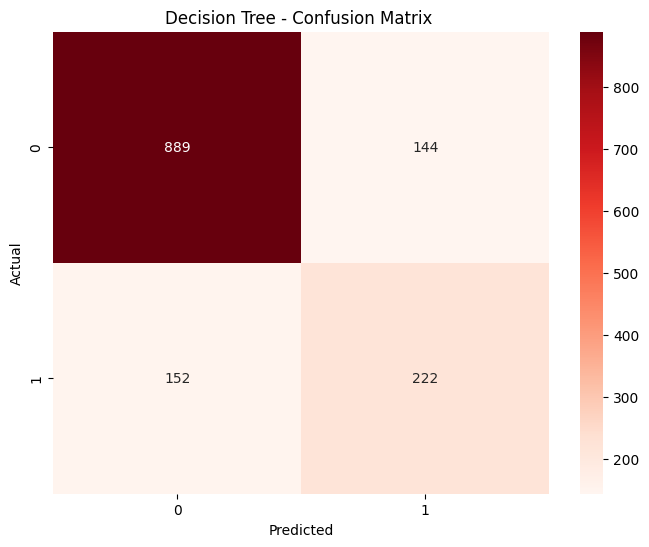

In [15]:
cm = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize = (8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap = 'Reds')
plt.title('Decision Tree - Confusion Matrix ')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

**3.1.3.2: ROC Curve**

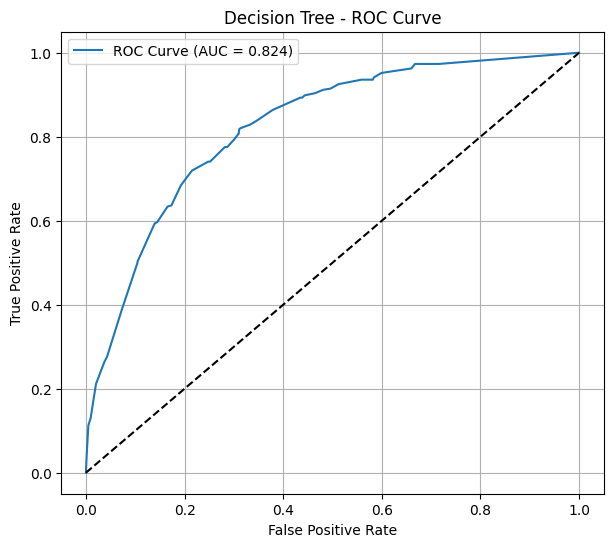

In [46]:
fpr_dt, tpr_dt, _ =roc_curve(y_test, y_pred_proba_dt)
plt.figure(figsize=(7,6))
plt.plot(fpr_dt, tpr_dt, label=f'ROC Curve (AUC = {roc_auc_score(y_test, y_pred_proba_dt):.3f})')
plt.plot([0,1], [0,1], 'k--')
plt.title('Decision Tree - ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.show()

**3.1.1.3: DT-Precision Recall Curve**

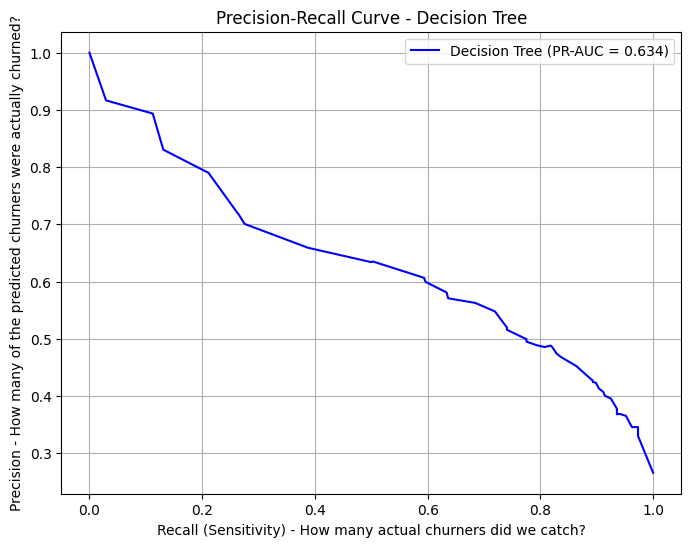

In [17]:
y_pred_proba_dt = best_model_dt.predict_proba(x_test_preprocessed)[:, 1]

precision_dt, recall_dt, thresholds_dt = precision_recall_curve(y_test, y_pred_proba_dt)
pr_auc_dt = auc(recall_dt, precision_dt)

plt.figure(figsize=(8,6))
plt.plot(recall_dt, precision_dt, label=f'Decision Tree (PR-AUC = {pr_auc_dt:.3f})', color='blue')
plt.xlabel('Recall (Sensitivity) - How many actual churners did we catch?')
plt.ylabel('Precision - How many of the predicted churners were actually churned?')
plt.title('Precision-Recall Curve - Decision Tree')
plt.legend()
plt.grid(True)
plt.show()

**3.1.4: DT- Feature Imporatance**

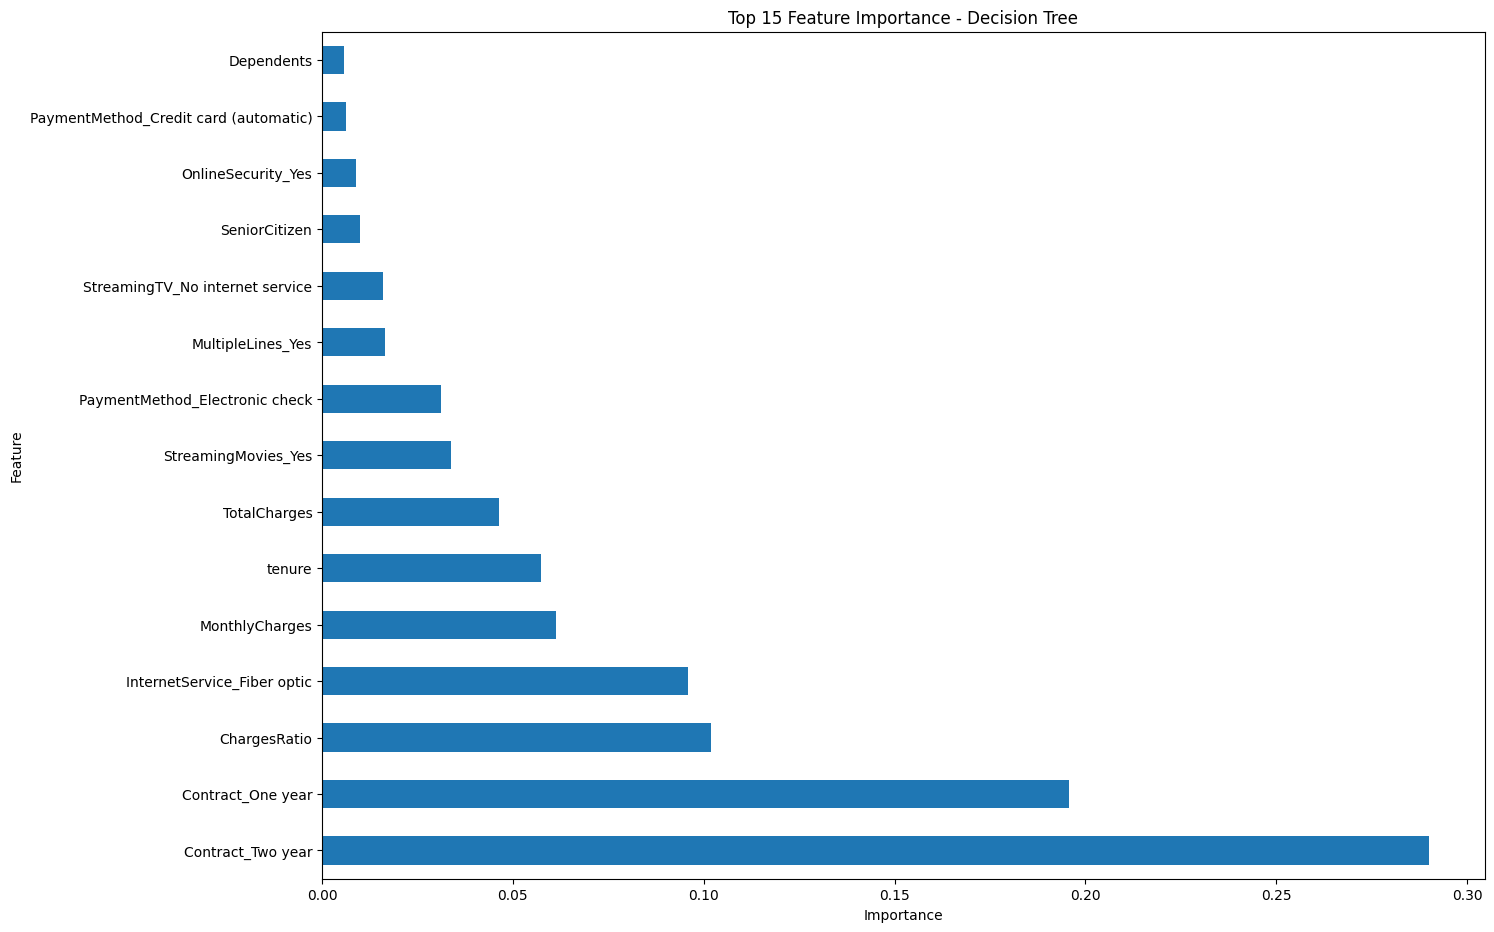

In [18]:
encoded_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols).tolist()
feature_names = numerical_cols + encoded_feature_names

importance = best_model_dt.feature_importances_
feat_imp = pd.Series(importance, index=feature_names).sort_values(ascending=False)[:15]

plt.figure(figsize=(15,11))
feat_imp.plot(kind='barh')
plt.title('Top 15 Feature Importance - Decision Tree')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# Why choosen Decision Tree?

* A Decision Tree classifier is choosen as the initial model because:
   1. Highly interpretable
   2. Able to capture non-linear relationships
   3. Easy to visualise and explain to business stakeholders
   4. Naturally handles categorical variables after encoding

*  The model splits data into meaningful groups based on information gain, makin it easy to identify influence factors such as contract type, tenure, and monthly charges.

*   This transparency is valuable in telecom context where stakeholders require understandable,explanation focused results.

* Since Decision trees can overfit and show high variance, parameters such as maximum depth and minimum samples per leaf were tuned to reduce complexity and maintain an appropriate balance between bias and variance.



# Decision Tree Summary

The Decision Tree achieved strong interpretability and reasonable predictive performance.

* The Decision Tree achieved an accuracy(after hyperparameter tunning) of 78.9623 % and ROC-AUC of ~0.82 indicating strong separability.

* While accuracy is reasonable, the model shows lower recall for the churn class (0.59), meaning it misses some churn customers.

* Precision(0.85) and recall(0.86) show the model is better at predicting non-churners

*   Feature importance reveals that **Contract, tenure, MonthlyCharges, and Fiber optic internet** are the strongest predictors.

*   Model is interpretable ->perfect for explaining to bussiness stakeholders

* Good baseline model cause before tunning it has the accuracy :     
    1. Training Accuracy: 99.8756 %
    2. Testing Accuracy: 72.2814 %






# **3.2: Neural Network Model (Keras)**

---



**3.2.1: Building BaseLine NN**

In [19]:
input_dim = x_train_preprocessed.shape[1]

model_base_nn = Sequential([
    Dense(32, activation='relu', input_shape=(input_dim,)),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

model_base_nn.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

history_base_nn = model_base_nn.fit(
    x_train_preprocessed,
    y_train,
    epochs =20,
    batch_size = 32,
    validation_split = 0.2,
    verbose = 0
)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


**3.2.1.1: Baseline NN Evaluation**

In [20]:
y_proba_nn_base = model_base_nn.predict(x_test_preprocessed).ravel()
y_pred_nn_base = (y_proba_nn_base > 0.5).astype(int)

print("Evaluation Results of Baseline NN:\n")
print("\n----- NN:Training Metrics -----")
print("\nAccuracy: ", round(accuracy_score(y_train, (model_base_nn.predict(x_train_preprocessed).ravel() > 0.5).astype(int))*100,4),"%")
print("\nROC AUC Score: ",roc_auc_score(y_train, model_base_nn.predict(x_train_preprocessed).ravel()))
print("\n----- NN:Testing Metrics -----")
print("\nAccuracy: ", round(accuracy_score(y_test, y_pred_nn_base)*100,4),"%")
print("\nROC AUC Score: ",roc_auc_score(y_test, y_proba_nn_base))
print("\nClassification Report: \n")
print(classification_report(y_test, y_pred_nn_base))

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Evaluation Results of Baseline NN:


----- NN:Training Metrics -----
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

Accuracy:  81.4756 %
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

ROC AUC Score:  0.8681249038360312

----- NN:Testing Metrics -----

Accuracy:  78.8202 %

ROC AUC Score:  0.8262187388376102

Classification Report: 

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.63      0.50      0.56       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407



**3.2.2: Hyperparameter tuning for NN**

In [21]:
layer_configs = [[64, 32], [128, 64], [128, 64, 32]]
learning_rates = [0.01, 0.001, 0.0001]
dropouts = [0.0, 0.2, 0.3]

best_nn_acc = 0
best_nn_params = {}
best_nn = None
best_history = None

for layers in layer_configs:
    for lr in learning_rates:
        for drop in dropouts:
            model = Sequential()
            model.add(Dense(layers[0], activation='relu', input_shape=(x_train_preprocessed.shape[1],))) # Corrected variable name
            if drop > 0:
                model.add(Dropout(drop))
            for size in layers[1:]:
                model.add(Dense(size, activation='relu'))
                if drop > 0:
                    model.add(Dropout(drop))
            model.add(Dense(1, activation='sigmoid'))

            model.compile(optimizer=Adam(learning_rate=lr), loss='binary_crossentropy', metrics=['accuracy'])

            history = model.fit(x_train_preprocessed, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=0)

            test_loss, test_acc = model.evaluate(x_test_preprocessed, y_test, verbose=0) # Added verbose=0 to suppress output during tuning
            if test_acc > best_nn_acc:
                best_nn_acc = test_acc
                best_nn_params = {'layers': layers, 'lr': lr, 'dropout': drop}
                best_nn = model
                best_history = history

print("Best NN Parameters (manual tuning):", best_nn_params)
print("Best NN Testing Accuracy:", best_nn_acc)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Best NN Parameters (manual tuning): {'layers': [128, 64], 'lr': 0.0001, 'dropout': 0.3}
Best NN Testing Accuracy: 0.8024165034294128


**3.2.3: Best NN Evaluation**

In [22]:
y_proba_nn = best_nn.predict(x_test_preprocessed)
y_pred_nn = (y_proba_nn > 0.5).astype(int).flatten()

train_acc_nn = best_history.history['accuracy'][-1]
val_acc_nn = best_history.history['val_accuracy'][-1]

print("Tuned NN Training Accuracy:", train_acc_nn)
print("Tuned NN Validation Accuracy:", val_acc_nn)
print("Tuned NN Testing Accuracy:", best_nn_acc)
print("\nTuned NN Classification Report (Test):\n", classification_report(y_test, y_pred_nn))
print("Tuned NN ROC AUC (Test):", roc_auc_score(y_test, y_proba_nn.flatten()))

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Tuned NN Training Accuracy: 0.8100000023841858
Tuned NN Validation Accuracy: 0.7946666479110718
Tuned NN Testing Accuracy: 0.8024165034294128

Tuned NN Classification Report (Test):
               precision    recall  f1-score   support

           0       0.85      0.89      0.87      1033
           1       0.65      0.56      0.60       374

    accuracy                           0.80      1407
   macro avg       0.75      0.72      0.73      1407
weighted avg       0.79      0.80      0.80      1407

Tuned NN ROC AUC (Test): 0.834858752090117


**3.2.3.1: Confusion Matrix**

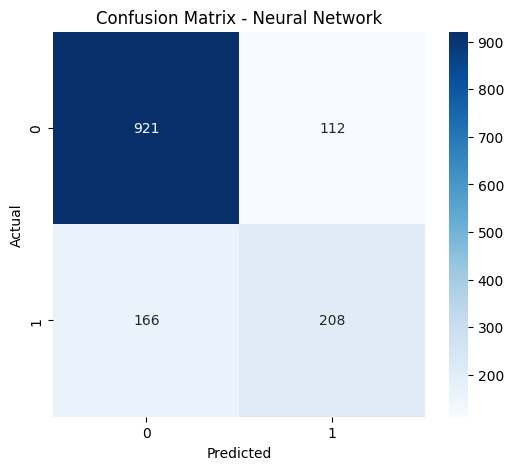

In [23]:
cm_nn = confusion_matrix(y_test, y_pred_nn)
plt.figure(figsize=(6,5))
sns.heatmap(cm_nn, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Neural Network')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

**3.2.3.2: ROC Curve**

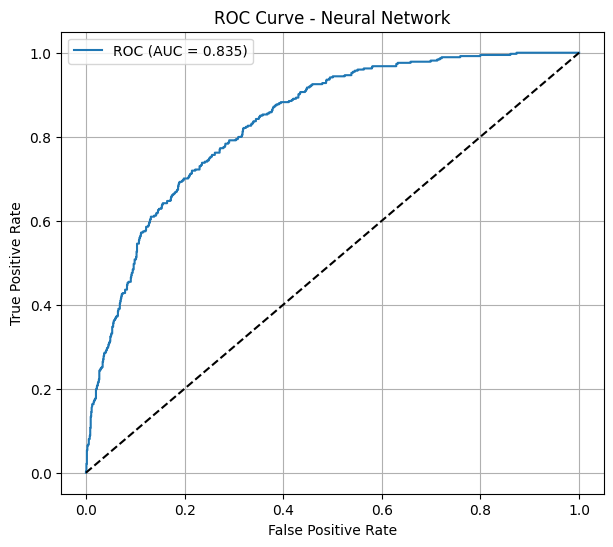

In [27]:
fpr_nn, tpr_nn, _ = roc_curve(y_test, y_proba_nn.flatten())
plt.figure(figsize=(7,6))
plt.plot(fpr_nn, tpr_nn, label=f'ROC (AUC = {roc_auc_score(y_test, y_proba_nn.flatten()):.3f})')
plt.plot([0,1], [0,1], 'k--')
plt.title('ROC Curve - Neural Network')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.show()

**3.2.3.3: DT-Precision Recall Curve**

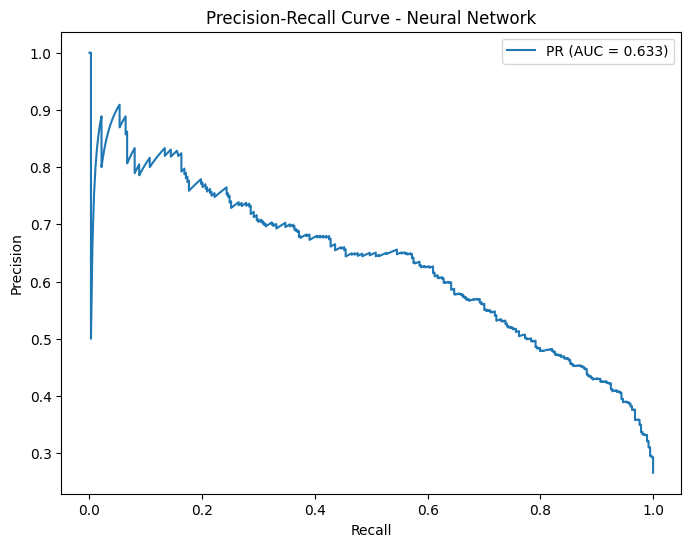

In [29]:
precision_nn, recall_nn, _ = precision_recall_curve(y_test, y_proba_nn.flatten())
plt.figure(figsize=(8,6))
plt.plot(recall_nn, precision_nn, label=f'PR (AUC = {auc(recall_nn, precision_nn):.3f})')
plt.title('Precision-Recall Curve - Neural Network')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()

**3.2.3.4: Training Curves for NN**

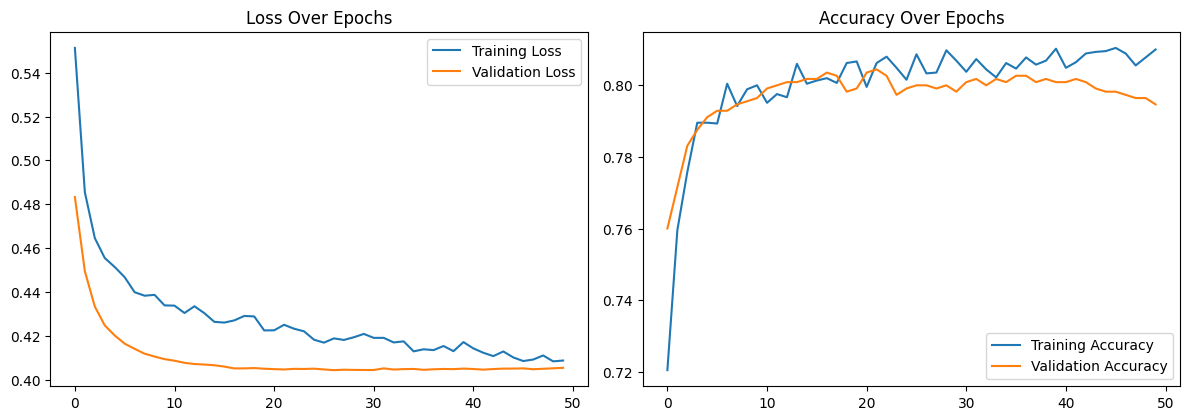

In [31]:
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.plot(best_history.history['loss'], label='Training Loss')
plt.plot(best_history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(best_history.history['accuracy'], label='Training Accuracy')
plt.plot(best_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.legend()

plt.tight_layout()
plt.show()

# **Step 04: Model Comparison (Decision Tress vs Neural Networks)**

In [40]:
# Calculate missing metrics for comparison

# DT Tuned metrics (from cell tElelLmrYiG0)
train_acc_dt = accuracy_score(y_train, y_pred_train_dt)
test_acc_dt = accuracy_score(y_test, y_pred_dt)

# NN Baseline training and testing accuracy (from cell AxFc8vWFf-a-)
train_acc_nn_base = accuracy_score(y_train, (model_base_nn.predict(x_train_preprocessed).ravel() > 0.5).astype(int))
test_acc_nn_base = accuracy_score(y_test, y_pred_nn_base)

# Calculate F1 scores for churn class (class 1)
# f1_score is already imported from sklearn.metrics
f1_churn_base_dt = f1_score(y_test, y_test_pred_dt_base, pos_label=1)
f1_churn_dt = f1_score(y_test, y_pred_dt, pos_label=1)
f1_churn_base_nn = f1_score(y_test, y_pred_nn_base, pos_label=1)
f1_churn_nn = f1_score(y_test, y_pred_nn, pos_label=1)

comparison = pd.DataFrame({
    'Model': ['DT Baseline', 'DT Tuned', 'NN Baseline', 'NN Tuned'],
    'Training Accuracy': [train_acc_dt_base, train_acc_dt, train_acc_nn_base, train_acc_nn],
    'Testing Accuracy': [test_acc_dt_base, test_acc_dt, test_acc_nn_base, best_nn_acc],
    'ROC AUC': [roc_auc_score(y_test, dt_base.predict_proba(x_test_preprocessed)[:,1]), roc_auc_score(y_test, y_pred_proba_dt), roc_auc_score(y_test, model_base_nn.predict(x_test_preprocessed).flatten()), roc_auc_score(y_test, y_proba_nn.flatten())],
    'F1 Churn': [f1_churn_base_dt, f1_churn_dt, f1_churn_base_nn, f1_churn_nn]
})

print("\nModel Comparison Table:\n")
#print(comparison)
display(comparison.style.format({'Decision Tree': '{:.4f}', 'Neural Network': '{:.4f}'}).background_gradient(cmap='viridis'))

176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

Model Comparison Table:



,Model,Training Accuracy,Testing Accuracy,ROC AUC,F1 Churn
0,DT Baseline,0.998756,0.722814,0.654309,0.493506
1,DT Tuned,0.811733,0.789623,0.824021,0.600000
2,NN Baseline,0.814756,0.788202,0.826219,0.555224
3,NN Tuned,0.810000,0.802417,0.834859,0.599424


In [42]:
# Calculate missing metrics for comparison

# DT Tuned metrics (from cell tElelLmrYiG0)
train_acc_dt = accuracy_score(y_train, y_pred_train_dt)
test_acc_dt = accuracy_score(y_test, y_pred_dt)

# NN Baseline training and testing accuracy (from cell AxFc8vWFf-a-)
train_acc_nn_base = accuracy_score(y_train, (model_base_nn.predict(x_train_preprocessed).ravel() > 0.5).astype(int))
test_acc_nn_base = accuracy_score(y_test, y_pred_nn_base)

# Calculate F1 scores for churn class (class 1)
# f1_score is already imported from sklearn.metrics
f1_churn_dt = f1_score(y_test, y_pred_dt, pos_label=1)
f1_churn_nn = f1_score(y_test, y_pred_nn, pos_label=1)

comparison = pd.DataFrame({
    'Model': ['DT Tuned', 'NN Tuned'],
    'Training Accuracy': [ train_acc_dt, train_acc_nn],
    'Testing Accuracy': [ test_acc_dt, best_nn_acc],
    'ROC AUC': [roc_auc_score(y_test, y_pred_proba_dt), roc_auc_score(y_test, y_proba_nn.flatten())],
    'F1 Churn': [f1_churn_dt, f1_churn_nn]
})

print("\nModel Comparison Table:\n")
#print(comparison)
display(comparison.style.format({'Decision Tree': '{:.4f}', 'Neural Network': '{:.4f}'}).background_gradient(cmap='viridis'))

176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

Model Comparison Table:



,Model,Training Accuracy,Testing Accuracy,ROC AUC,F1 Churn
0,DT Tuned,0.811733,0.789623,0.824021,0.600000
1,NN Tuned,0.810000,0.802417,0.834859,0.599424


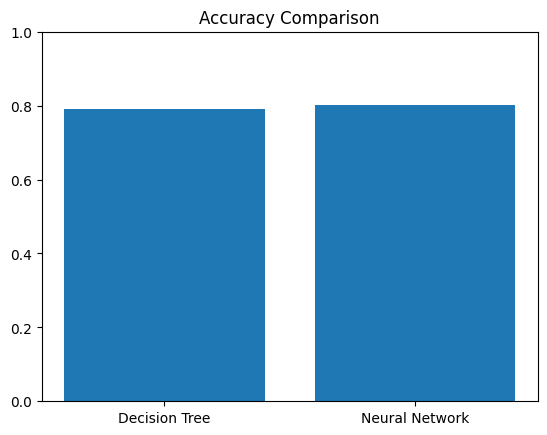

In [43]:
models = ["Decision Tree", "Neural Network"]
accuracies = [
    accuracy_score(y_test, y_pred_dt),
    accuracy_score(y_test, y_pred_nn)
]

plt.bar(models, accuracies)
plt.ylim(0,1)
plt.title("Accuracy Comparison")
plt.show()

/tmp/ipython-input-1533227773.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y=metric, data=comparison, ax=axes[i], palette='viridis')
/tmp/ipython-input-1533227773.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y=metric, data=comparison, ax=axes[i], palette='viridis')
/tmp/ipython-input-1533227773.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y=metric, data=comparison, ax=axes[i], palette='viridis')
/tmp/ipython-input-1533227773.py:5: FutureWarning: 

Passing `palette` without assigning `hue`

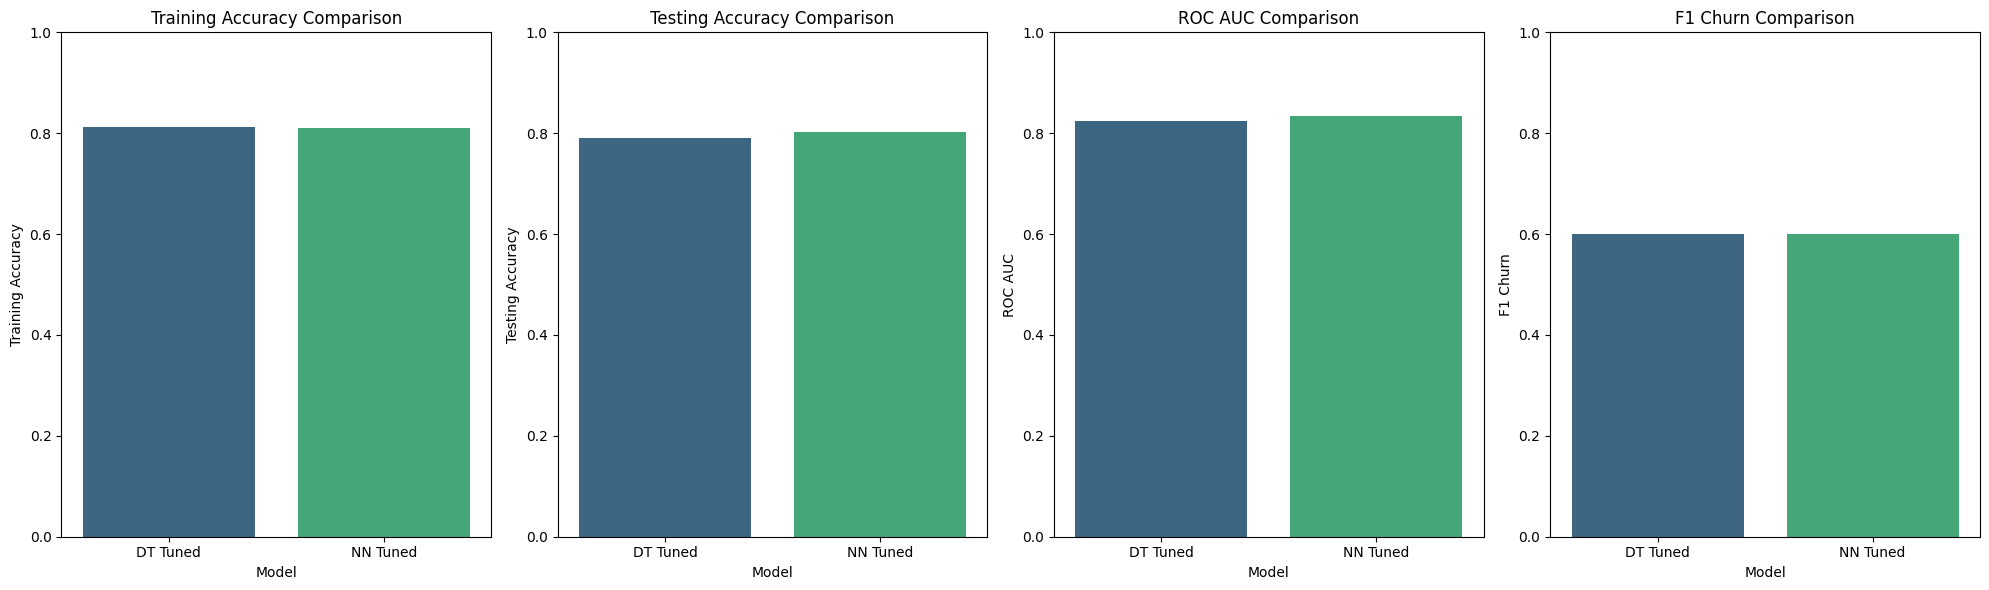

In [44]:
# Comparison Bar Plots
metrics = ['Training Accuracy', 'Testing Accuracy', 'ROC AUC', 'F1 Churn']
fig, axes = plt.subplots(1, 4, figsize=(20, 6))
for i, metric in enumerate(metrics):
    sns.barplot(x='Model', y=metric, data=comparison, ax=axes[i], palette='viridis')
    axes[i].set_title(f'{metric} Comparison')
    axes[i].set_ylim(0, 1)
plt.tight_layout()
plt.show()

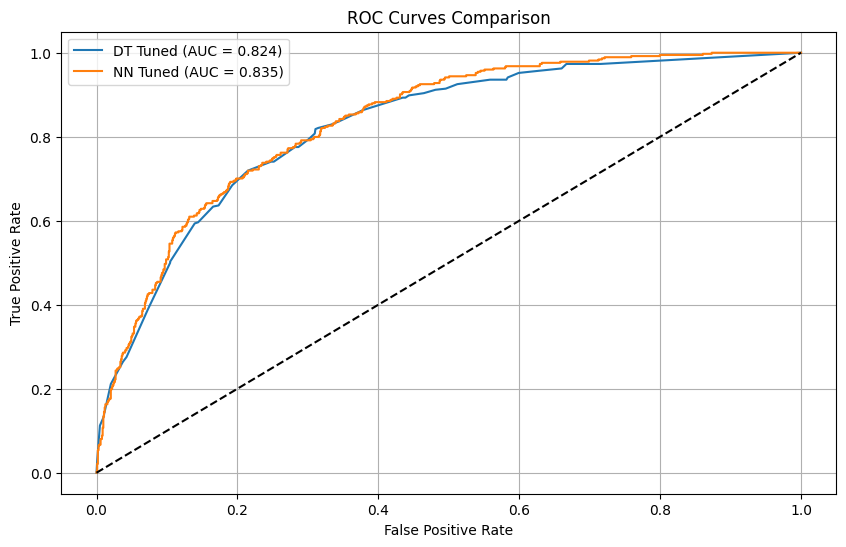

In [49]:
# Multi-Model ROC
plt.figure(figsize=(10, 6))
plt.plot(fpr_dt, tpr_dt, label='DT Tuned (AUC = {:.3f})'.format(roc_auc_score(y_test, y_pred_proba_dt)))
plt.plot(fpr_nn, tpr_nn, label='NN Tuned (AUC = {:.3f})'.format(roc_auc_score(y_test, y_proba_nn.flatten())))
plt.plot([0,1], [0,1], 'k--')
plt.title('ROC Curves Comparison')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.show()

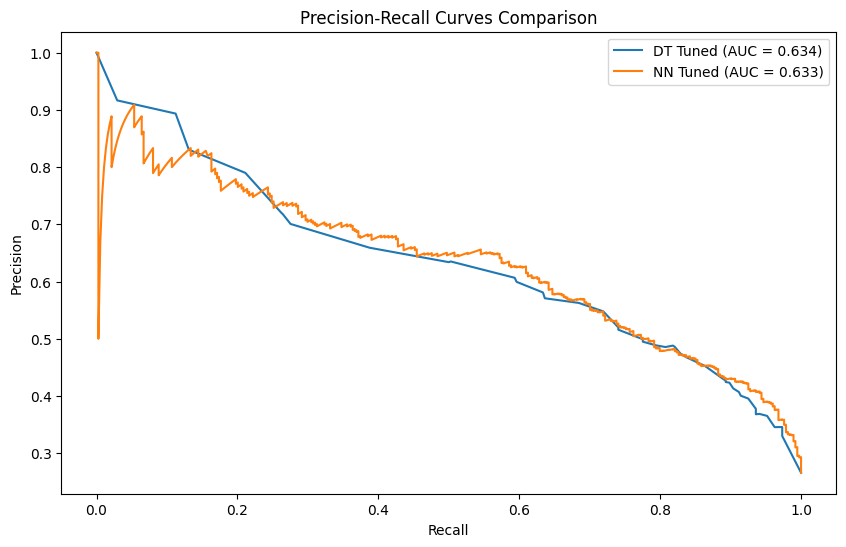

In [50]:
# Multi-Model PR Curve
plt.figure(figsize=(10, 6))
plt.plot(recall_dt, precision_dt, label='DT Tuned (AUC = {:.3f})'.format(auc(recall_dt, precision_dt)))
plt.plot(recall_nn, precision_nn, label='NN Tuned (AUC = {:.3f})'.format(auc(recall_nn, precision_nn)))
plt.title('Precision-Recall Curves Comparison')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()